In [1]:
%matplotlib inline

from IPython.display import clear_output

from NIX_Testing import NIX_Image_List, NIX_Image, doGridAnalysis, ProgressBar
from pylab import *
from astropy.io import fits
from lmfit.models import LinearModel, ConstantModel, StepModel
import pickle
from astropy.time import Time

data_dir = '/home/ydallilar/Documents/MPE/ERIS/NIX_Testing/2019-11-03/'
data_dir = '/home/ydallilar/Documents/MPE/ERIS/NIX_Testing/nixDetBackup/'

config = {'data_dir' : data_dir, "test_ids" : ['PER-045-20-1', 'PER-045-21-1']}
NIX_GL = NIX_Image_List(config)
#NIX_GL.filter(slice(0,70,1))

In [2]:
keywords = ['DATE', 'EXPTIME']
tbl_fmt = '%20s,%40s,%20s,%20s'

NIX_GL.printFiltered(keywords, tbl_fmt)

 NDX             TEST_ID,                                FILENAME,                DATE,             EXPTIME
0000        PER-045-20-1,         ERIS_NIX_CAL_DARKS307_0001.fits,2019-11-03T09:46:42.7219,                 2.0
0001        PER-045-20-1,         ERIS_NIX_CAL_DARKS307_0002.fits,2019-11-03T09:47:27.8518,                10.0
0002        PER-045-20-1,         ERIS_NIX_CAL_DARKS307_0003.fits,2019-11-03T09:50:40.5187,                60.0
0003        PER-045-20-1,         ERIS_NIX_CAL_DARKS307_0004.fits,2019-11-03T10:50:53.8741,              1200.0
0004        PER-045-20-1,         ERIS_NIX_CAL_DARKS307_0005.fits,2019-11-03T11:50:00.8100,                 2.0
0005        PER-045-20-1,         ERIS_NIX_CAL_DARKS307_0006.fits,2019-11-03T11:50:44.8003,                10.0
0006        PER-045-20-1,         ERIS_NIX_CAL_DARKS307_0007.fits,2019-11-03T11:53:57.7584,                60.0
0007        PER-045-20-1,         ERIS_NIX_CAL_DARKS307_0008.fits,2019-11-03T12:54:10.5970,              120

0082        PER-045-20-1,         ERIS_NIX_CAL_DARKS308_0035.fits,2019-11-04T16:46:12.6868,                60.0
0083        PER-045-20-1,         ERIS_NIX_CAL_DARKS308_0036.fits,2019-11-04T17:46:26.5389,              1200.0
0084        PER-045-20-1,         ERIS_NIX_CAL_DARKS308_0037.fits,2019-11-04T17:46:46.5355,                 2.0
0085        PER-045-20-1,         ERIS_NIX_CAL_DARKS308_0038.fits,2019-11-04T17:47:29.7567,                10.0
0086        PER-045-20-1,         ERIS_NIX_CAL_DARKS308_0039.fits,2019-11-04T17:50:42.7751,                60.0
0087        PER-045-20-1,         ERIS_NIX_CAL_DARKS308_0040.fits,2019-11-04T18:50:56.4210,              1200.0
0088        PER-045-20-1,         ERIS_NIX_CAL_DARKS308_0041.fits,2019-11-04T18:51:16.3767,                 2.0
0089        PER-045-20-1,         ERIS_NIX_CAL_DARKS308_0042.fits,2019-11-04T18:51:59.6473,                10.0
0090        PER-045-20-1,         ERIS_NIX_CAL_DARKS308_0043.fits,2019-11-04T18:55:12.8418,             

In [3]:
NIX_GL.filter(slice(3,92,4))
keywords = ['DATE', 'HIERARCH ESO DET READ CURNAME']
NIX_GL.printFiltered(keywords, tbl_fmt)

meds = NIX_GL.getMedian()
temp = NIX_GL.getHeaderValue('HIERARCH ESO INS2 TEMP150 VAL')
time = Time(NIX_GL.getHeaderValue('DATE'))


 NDX             TEST_ID,                                FILENAME,                DATE,    DET_READ_CURNAME
0000        PER-045-20-1,         ERIS_NIX_CAL_DARKS307_0004.fits,2019-11-03T10:50:53.8741,         SLOW_LR_CDS
0001        PER-045-20-1,         ERIS_NIX_CAL_DARKS307_0008.fits,2019-11-03T12:54:10.5970,         SLOW_LR_CDS
0002        PER-045-20-1,         ERIS_NIX_CAL_DARKS307_0012.fits,2019-11-03T13:59:21.7477,         SLOW_LR_CDS
0003        PER-045-20-1,         ERIS_NIX_CAL_DARKS307_0016.fits,2019-11-03T15:28:05.7450,         SLOW_LR_CDS
0004        PER-045-20-1,         ERIS_NIX_CAL_DARKS307_0020.fits,2019-11-03T16:32:39.8545,         SLOW_LR_CDS
0005        PER-045-20-1,         ERIS_NIX_CAL_DARKS307_0024.fits,2019-11-03T17:37:09.7701,         SLOW_LR_CDS
0006        PER-045-20-1,         ERIS_NIX_CAL_DARKS307_0028.fits,2019-11-03T18:41:39.8622,         SLOW_LR_CDS
0007        PER-045-20-1,         ERIS_NIX_CAL_DARKS307_0032.fits,2019-11-03T19:46:10.4657,         SLOW_LR_

<IPython.core.display.Javascript object>


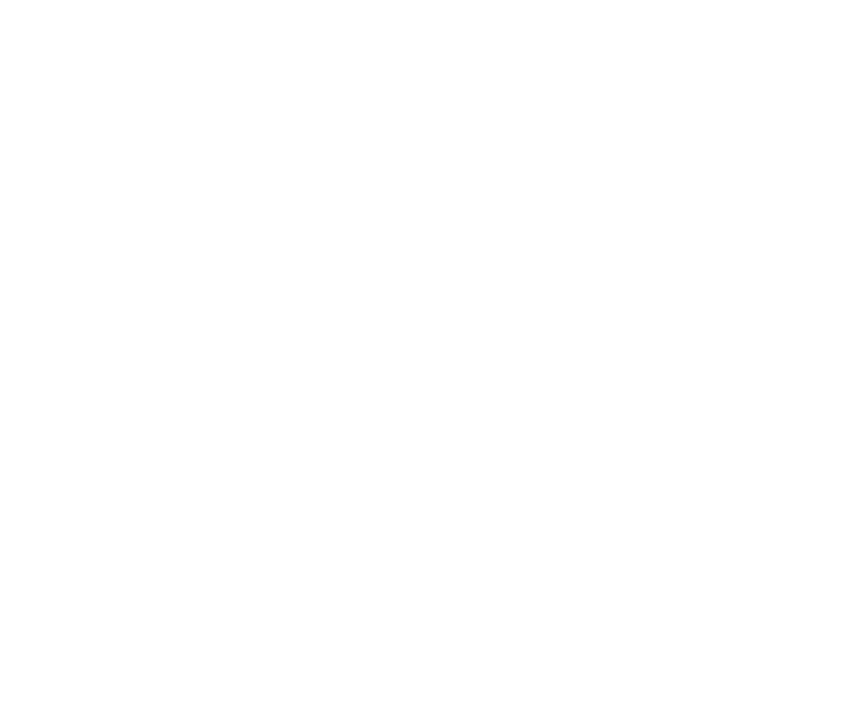

In [4]:
%matplotlib notebook
figure(figsize=(12,10))
plot_date(time.plot_date, meds, 'b.')
show()

In [5]:
NIX_GL.filter(slice(92,123,1))
keywords = ['DATE', 'HIERARCH ESO DET READ CURNAME']
NIX_GL.printFiltered(keywords, tbl_fmt)

meds = NIX_GL.getMedian()
temp = NIX_GL.getHeaderValue('HIERARCH ESO INS2 TEMP150 VAL')
time = Time(NIX_GL.getHeaderValue('DATE'))

 NDX             TEST_ID,                                FILENAME,                DATE,    DET_READ_CURNAME
0000        PER-045-21-1,         ERIS_NIX_CAL_DARKS308_0045.fits,2019-11-04T22:27:50.5383,         SLOW_LR_CDS
0001        PER-045-21-1,         ERIS_NIX_CAL_DARKS308_0046.fits,2019-11-04T22:37:59.5047,         SLOW_LR_CDS
0002        PER-045-21-1,         ERIS_NIX_CAL_DARKS308_0047.fits,2019-11-04T22:48:08.9488,         SLOW_LR_CDS
0003        PER-045-21-1,         ERIS_NIX_CAL_DARKS308_0048.fits,2019-11-04T22:58:17.5535,         SLOW_LR_CDS
0004        PER-045-21-1,         ERIS_NIX_CAL_DARKS308_0049.fits,2019-11-04T23:08:26.6652,         SLOW_LR_CDS
0005        PER-045-21-1,         ERIS_NIX_CAL_DARKS308_0050.fits,2019-11-04T23:20:53.2959,         SLOW_LR_CDS
0006        PER-045-21-1,         ERIS_NIX_CAL_DARKS309_0001.fits,2019-11-05T02:09:19.2062,         SLOW_LR_CDS
0007        PER-045-21-1,         ERIS_NIX_CAL_DARKS309_0002.fits,2019-11-05T02:49:52.0049,         SLOW_LR_

<IPython.core.display.Javascript object>


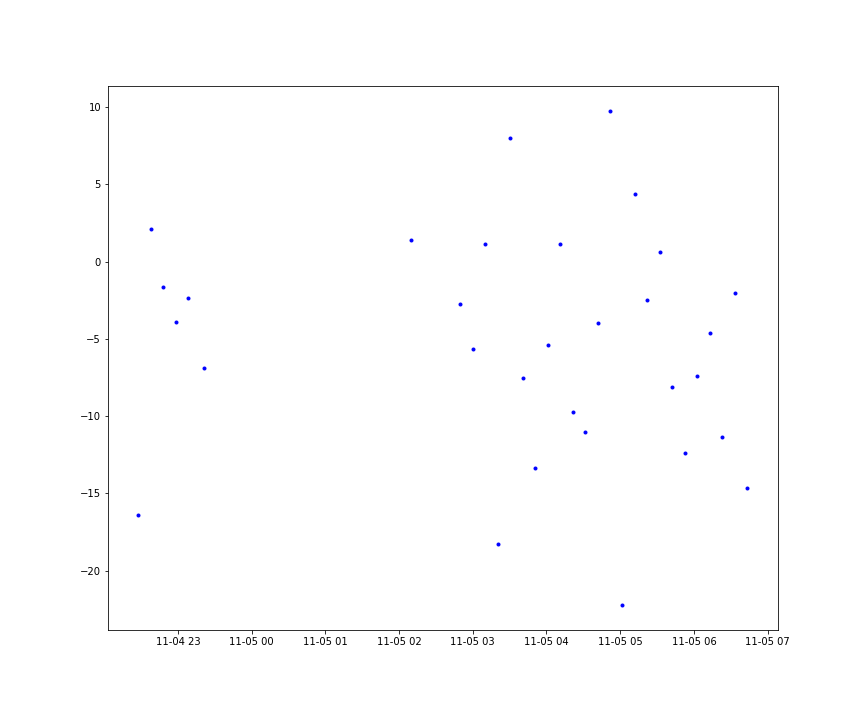

In [6]:
%matplotlib notebook
figure(figsize=(12,10))
plot_date(time.plot_date, meds, 'b.')
show()

In [7]:
ims = NIX_GL.getImage()

In [8]:
hists = []
for i in range(31):
    diff = median(ims[:,:,i]-ims[:,:,0])
    hist, bins = histogram(ims[:,:,i]-diff, bins=150, range=[-50,100])
    print hist.max()
    hists.append(hist)

254046
266857
273128
262901
276686
282801
287180
201302
261943
276194
268293
271853
282433
258443
263476
260275
268899
261520
268112
263711
245947
259379
277218
267217
269254
266300
268265
272925
256656
259510
263516


<IPython.core.display.Javascript object>


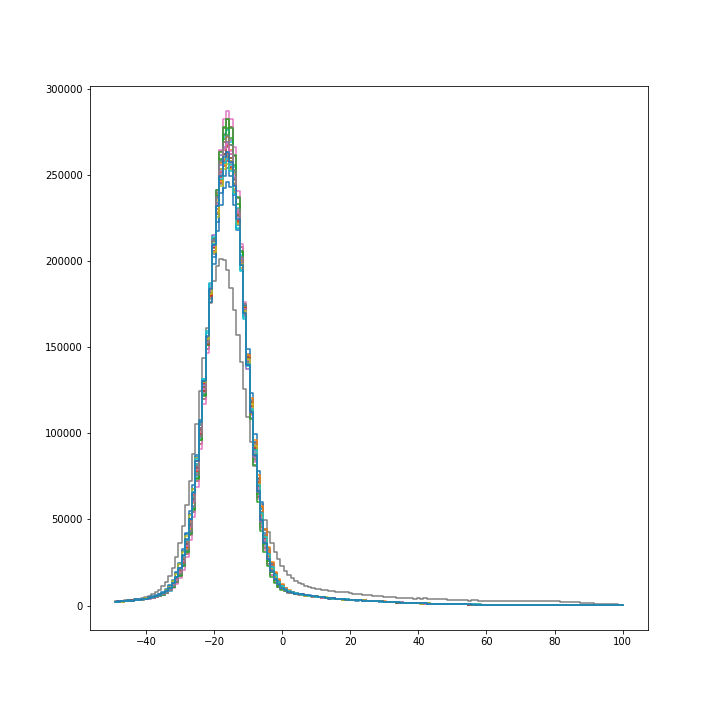

In [9]:
figure(figsize=(10,10))
for i in range(31):
    plot(bins[1:], hists[i], drawstyle='steps-mid')

<IPython.core.display.Javascript object>


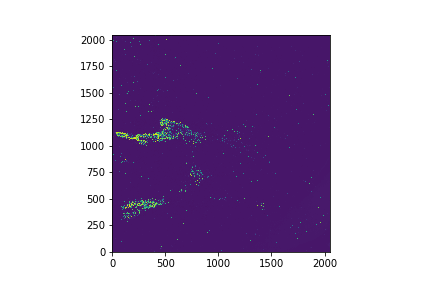

In [10]:
figure()
NIX_GL[7].plotImage()